## Observations and Insights

## Dependencies and starter code

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np



# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cmpD=study_data_complete
grpCmpD=cmpD.groupby("Drug Regimen")

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_stat=pd.DataFrame({
    "Mean Tumor Volume":grpCmpD["Tumor Volume (mm3)"].mean(),
    "Meadian Tumor Volume":grpCmpD["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance":grpCmpD["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.":grpCmpD["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err":grpCmpD["Tumor Volume (mm3)"].sem()
})
Summary_stat

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

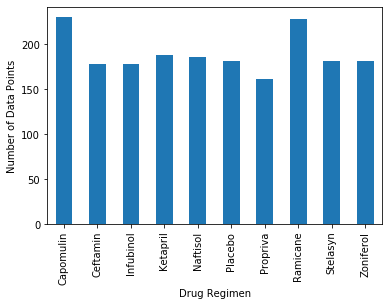

In [149]:

# Generate a bar plot showing number of data points for each treatment regimen using pandas
grpCmpD.Sex.count().plot(kind="bar").set_ylabel("Number of Data Points")
plt.savefig("Drug_Reg_Chart.png")
plt.show()

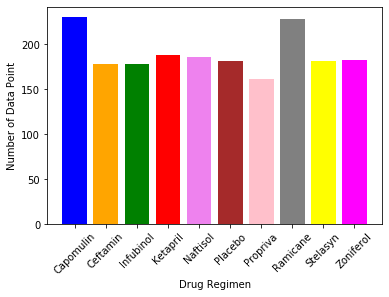

In [150]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y=grpCmpD.Sex.count().array
x=grpCmpD.Sex.count().index.array
plt.bar(x,y,color=["blue","orange","green","red","violet","brown","pink","grey","yellow","magenta"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Point")
plt.savefig("Drug_Reg_Chart2.png")
plt.show()

## Pie plots

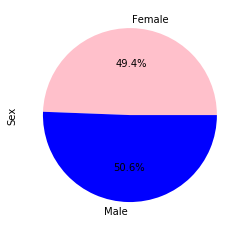

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
grpGend=cmpD.groupby("Sex")

grpGend.Sex.count().plot(kind="pie",colors=["pink", "blue"],\
                         textprops={"color":"black"},autopct="%1.1f%%")
plt.savefig("Panda_Pie.png")

plt.show()

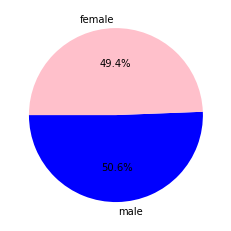

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grpGendCnt= [958,935]

labels = ["male", "female"]
colors = ["blue", "pink"]

plt.pie(grpGendCnt, autopct="%1.1f%%", colors=colors, startangle=180, labels=labels)

plt.savefig("Py_Pie.png")

plt.show()

## Quartiles, outliers and boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor = study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

merge_data = study_data_complete[['Mouse ID','Timepoint']].merge(study_data_complete,on=['Mouse ID','Timepoint'],how="left")
capomulin_df = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin"]['Tumor Volume (mm3)']
ceftamin_df = merge_data.loc[merge_data["Drug Regimen"]=="Ceftamin"]['Tumor Volume (mm3)']
ramicane_df = merge_data.loc[merge_data["Drug Regimen"]=="Ramicane"]['Tumor Volume (mm3)']
infubinol_df = merge_data.loc[merge_data["Drug Regimen"]=="Infubinol"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_finals = capomulin_df
cap_quarts = cap_finals.quantile([.25,.5,.75])
cap_lowerq = cap_quarts[0.25]
cap_upperq = cap_quarts[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_b = cap_lowerq - (1.5*cap_iqr)
cap_upper_b = cap_upperq + (1.5*cap_iqr)

cef_finals = ceftamin_df
cef_quarts = cef_finals.quantile([.25,.5,.75])
cef_lowerq = cef_quarts[0.25]
cef_upperq = cef_quarts[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_b = cef_lowerq - (1.5*cef_iqr)
cef_upper_b = cef_upperq + (1.5*cef_iqr)

ram_finals = ramicane_df
ram_quarts = ram_finals.quantile([.25,.5,.75])
ram_lowerq = ram_quarts[0.25]
ram_upperq = ram_quarts[0.75]
ram_iqr = ram_upperq-cef_lowerq
ram_lower_b = ram_lowerq - (1.5*ram_iqr)
ram_upper_b = ram_upperq + (1.5*ram_iqr)

inf_finals = infubinol_df
inf_quarts = inf_finals.quantile([.25,.5,.75])
inf_lowerq = inf_quarts[0.25]
inf_upperq = inf_quarts[0.75]
inf_iqr = inf_upperq-cef_lowerq
inf_lower_b = inf_lowerq - (1.5*inf_iqr)
inf_upper_b = inf_upperq + (1.5*inf_iqr)


print(f"Capomluin potential outliers: {cap_lower_b} and {cap_upper_b}")
print(f"Ceftamin potential outliers: {cef_lower_b} and {cef_upper_b}")
print(f"Ramicane potential outliers: {ram_lower_b} and {ram_upper_b}")
print(f"Infubinol potential outliers: {inf_lower_b} and {inf_upper_b}")


Capomluin potential outliers: 26.714832162499995 and 55.9711007025
Ceftamin potential outliers: 32.818911426250004 and 71.19095325625
Ramicane potential outliers: 39.98727525375 and 41.68735933124999
Infubinol potential outliers: 32.1533280175 and 72.47346925000001


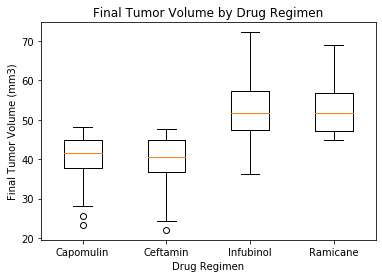

In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_df,ramicane_df,infubinol_df,ceftamin_df],labels=['Capomulin','Ceftamin','Infubinol','Ramicane'])
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.savefig("Box_plot.png")

plt.show()

## Line and scatter plots

In [155]:
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


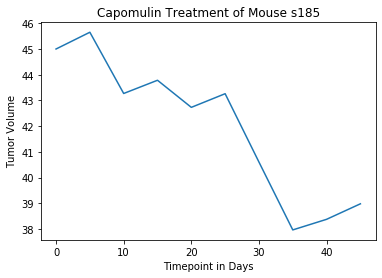

In [156]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_group = study_data_complete.groupby(["Mouse ID"])
mouse_group_df = pd.DataFrame({
    "Mouse ID":study_data_complete["Mouse ID"],
    "Timepoint":study_data_complete["Timepoint"],
    "Tumor Volume":study_data_complete["Tumor Volume (mm3)"]})

mouse_df = pd.DataFrame(mouse_group_df.loc[mouse_group_df["Mouse ID"] == "b128"]["Tumor Volume"])

x_axis = [0,5,10,15,20,25,30,35,40,45]
y_axis = mouse_df["Tumor Volume"]

plt.plot(x_axis,y_axis)
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume")
plt.savefig("Line_Chart.png")

plt.show()

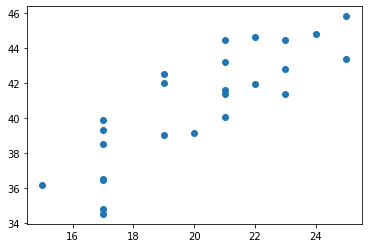

In [162]:

capo_df2 = study_data_complete[study_data_complete["Drug Regimen"] == "Capomulin"]

capo_df3 = capo_df2.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"].to_frame()
capo_df3 = capo_df3.reset_index()

x_axis = capo_df3['Weight (g)']
y_axis = capo_df3['Tumor Volume (mm3)'] 

plt.scatter(x_axis, y_axis)

plt.savefig("Scatter_Plot.png")

plt.show()

In [158]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between weight and color tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")


The correlation coefficient between weight and color tumor volume is 0.84


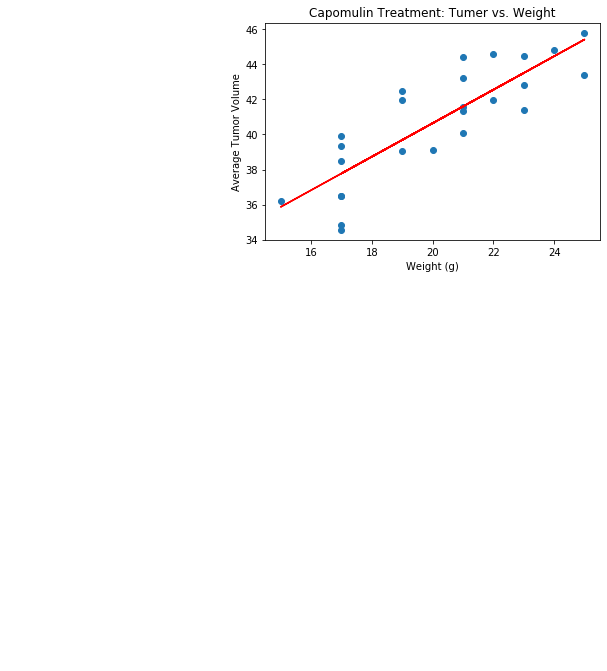

In [161]:
capo_df2 = study_data_complete[study_data_complete["Drug Regimen"] == "Capomulin"]

capo_df3 = capo_df2.groupby(["Mouse ID","Weight (g)"]).mean()["Tumor Volume (mm3)"].to_frame()
capo_df3 = capo_df3.reset_index()

x_axis = capo_df3['Weight (g)']
y_axis = capo_df3['Tumor Volume (mm3)'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Capomulin Treatment: Tumer vs. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.savefig("Regression.png")

plt.show